<a href="https://colab.research.google.com/github/charan-manigandan/CancerDetection/blob/main/CancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection, svm, metrics
from itertools import cycle

In [24]:
# Read the caner dataset
data = pd.read_csv("cancer_cell_dataset.csv")
# head lists first 5 rows and all columns present in a dataset for a information grasp
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [25]:
print("Data types of features are:\n{}".format(data.dtypes))

Data types of features are:
ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


In [26]:
# As BareNuc not having a numeric value lets convert that into numeric value
data = data[pd.to_numeric(data['BareNuc'], errors="coerce").notnull()]

#After getting only numeric and non-null values, we can convert the type to int
data["BareNuc"] = data["BareNuc"].astype('int64')

print("Configured data types:\n{}".format(data.dtypes))

Configured data types:
ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object


<ipython-input-26-ecd641d15f08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BareNuc"] = data["BareNuc"].astype('int64')


In [27]:
# Preparing the dataset

X = np.asanyarray(data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
y = np.asanyarray(data['Class'].astype('int'))

print("Features:\n{}\nClasses:\n{}".format(X[:3], y[:3]))

Features:
[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]]
Classes:
[2 2 2]


In [28]:
training_X, test_X, training_y, test_y = model_selection.train_test_split(X, y, test_size=0.2)

print("Training set: {}\nTest set: {}".format((training_X.shape, training_y.shape), (test_X.shape, test_y.shape)))

Training set: ((546, 9), (546,))
Test set: ((137, 9), (137,))


In [29]:
# Creating and evaluating the model using SVM

model_rbf = svm.SVC(kernel='rbf')

model_rbf.fit(training_X, training_y)
y_hat = model_rbf.predict(test_X)

print("True Labels: {}\nPredicted Labels:{}".format(test_y[3:12], y_hat[3:12]))

True Labels: [4 2 2 2 2 4 4 2 2]
Predicted Labels:[4 2 2 2 2 4 4 2 2]


In [31]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

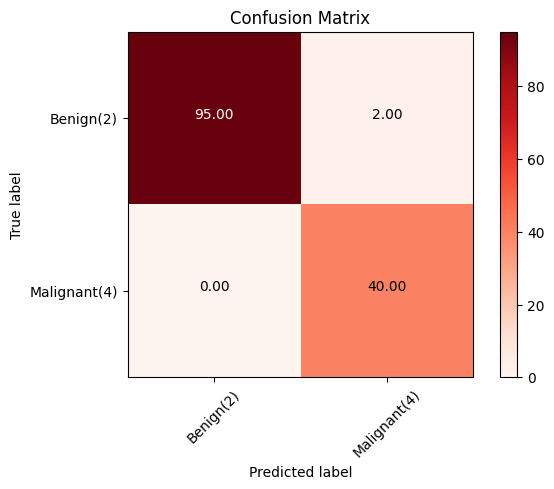

In [32]:
cf_matrix = metrics.confusion_matrix(test_y, y_hat, labels=[2,4])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cf_matrix, classes=['Benign(2)','Malignant(4)'], title='Confusion Matrix')

In [33]:
print(metrics.classification_report(test_y, y_hat))

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        97
           4       0.95      1.00      0.98        40

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



In [34]:
# Check on to the accuracy of F1 and Jaccard model

print("F1-score of our model: {}".format(metrics.f1_score(test_y, y_hat, average="weighted")))
print("Jaccard index: {}".format(metrics.jaccard_score(test_y, y_hat, pos_label=2)))

F1-score of our model: 0.9855034567681442
Jaccard index: 0.979381443298969


In [35]:
model_linear = svm.SVC(kernel="linear")

model_linear.fit(training_X, training_y)
y_hat = model_linear.predict(test_X)

print(metrics.classification_report(test_y, y_hat))

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        97
           4       0.95      1.00      0.98        40

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



In [36]:
model_linear = svm.SVC(kernel="sigmoid")

model_linear.fit(training_X, training_y)
y_hat = model_linear.predict(test_X)

print(metrics.classification_report(test_y, y_hat))

              precision    recall  f1-score   support

           2       0.61      0.64      0.62        97
           4       0.00      0.00      0.00        40

    accuracy                           0.45       137
   macro avg       0.30      0.32      0.31       137
weighted avg       0.43      0.45      0.44       137

